### 1. 라이브러리 불러오기

In [1]:
import warnings

In [2]:
warnings.filterwarnings(action="ignore")

In [3]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

### 2. 데이터 불러오기 및 분리

In [4]:
basedir = "../images/cat_dog/datasets/train/"
testdir = "../images/cat_dog/datasets/test/"

In [23]:
categories = os.listdir(basedir)
IMG_SIZE = 48

In [6]:
def imageLoad(basedir,IMG_SIZE):
    imageList = []
    labelList = []
    categories = os.listdir(basedir)
    #폴더 순환
    for i in range(0, len(categories)):

        labelPath = os.path.join(basedir,categories[i])
        imagePath = os.listdir(labelPath)
        #이미지 순환
        for j in range(0,len(imagePath)):
            imageFullPath = os.path.join(labelPath, imagePath[j])
            try:
                baseimg = cv2.imread(imageFullPath,cv2.IMREAD_GRAYSCALE)
                ### 1. 이미지 사이즈 변경
                ### 2. 이미지 칼러 변경(이미 완료)
                refinedImg = cv2.resize(baseimg, (IMG_SIZE,IMG_SIZE))
                #plt.imshow(refinedImg)
                imageList.append(refinedImg)
                labelList.append(i)
            except Exception as e:
                print(e, imageFullPath)
                pass

    imageArray = np.array(imageList)
    labelArray = np.array(labelList)
    return imageArray, labelArray

In [7]:
imageList,labelList = imageLoad(basedir,48)

In [8]:
# imageTestList,labelTestList = imageLoad(testdir)  기존 처럼 분리 train_test_split 사용

In [10]:
print(imageList.shape)
print(labelList.shape)

(20000, 48, 48)
(20000,)


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
trainingData_features,\
testData_features,\
trainingData_labels,\
testData_labels =\
train_test_split(imageList, labelList, test_size= 0.2, random_state=2)

In [20]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(16000, 48, 48)
(4000, 48, 48)
(16000,)
(4000,)


In [24]:
trainingData_features = trainingData_features.reshape(len(trainingData_features),IMG_SIZE,IMG_SIZE,1)
testData_features = testData_features.reshape(len(testData_features),IMG_SIZE,IMG_SIZE,1)

In [25]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(16000, 48, 48, 1)
(4000, 48, 48, 1)
(16000,)
(4000,)


In [26]:
trainingData_features_norm = trainingData_features/255.0
testData_features_norm = testData_features/255.0

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
trainingData_labels_one = to_categorical(trainingData_labels)
testData_labels_one = to_categorical(testData_labels)

In [29]:
trainingData_labels_one[0]

array([1., 0.], dtype=float32)

### 3. 모델 생성

In [30]:
inputShape = trainingData_features[0].shape
inputShape

(48, 48, 1)

In [31]:
outputShape = len(categories)

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [33]:
# 모델 생성 시작
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = inputShape
                ))

In [34]:
model.add(MaxPooling2D(pool_size=2))

In [35]:
model.add(Dropout(rate=0.4)) ##사용할 비율을 설정

In [36]:
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                 activation="relu",
                 input_shape = inputShape
                ))

In [37]:
model.add(MaxPooling2D(pool_size=2))

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(units=outputShape,
               activation="softmax"))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                

### 4. 모델 컴파일

In [41]:
##loss, merics,optimizer
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### 5. 모델 학습

In [42]:
33600 / 32 ##가중치 변경 횟수

1050.0

In [43]:
epochNo = 5

In [44]:
trainingData_features_norm[0].shape

(48, 48, 1)

In [45]:
model.fit(x=trainingData_features_norm,y=trainingData_labels_one, epochs=epochNo,
          batch_size = 32,
         validation_data=(testData_features_norm,testData_labels_one))

Train on 16000 samples, validate on 4000 samples
Epoch 1/5
16000/16000 [==============================] - 25s 2ms/sample - loss: 0.6378 - accuracy: 0.6246 - val_loss: 0.5947 - val_accuracy: 0.6722
Epoch 2/5
16000/16000 [==============================] - 28s 2ms/sample - loss: 0.5582 - accuracy: 0.7151 - val_loss: 0.5346 - val_accuracy: 0.7312
Epoch 3/5
16000/16000 [==============================] - 29s 2ms/sample - loss: 0.5286 - accuracy: 0.7367 - val_loss: 0.5294 - val_accuracy: 0.7365
Epoch 4/5
16000/16000 [==============================] - 29s 2ms/sample - loss: 0.5054 - accuracy: 0.7551 - val_loss: 0.5068 - val_accuracy: 0.7527
Epoch 5/5
16000/16000 [==============================] - 30s 2ms/sample - loss: 0.4884 - accuracy: 0.7660 - val_loss: 0.4985 - val_accuracy: 0.7548


### 6. 모델 추론

In [46]:
model.evaluate(x = testData_features_norm, y = testData_labels_one)

4000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4984971766471863, 0.75475]

### 7. 모델 예측

In [47]:
testData = cv2.imread("d:/68.jpg", cv2.IMREAD_COLOR)

In [48]:
def refineImage(testImg):
    ## 테스트 이미지 컬러 변경
    ## 컬러이미지 -> 회색톤으로 변경
    IMG_SIZE = 48
    img_gray= cv2.cvtColor(testImg,cv2.COLOR_RGB2GRAY)

    ## 사이즈 조정
    img_resize = cv2.resize(img_gray,(IMG_SIZE,IMG_SIZE))

    ## shape 변경
    img_shape = img_resize.reshape(1,IMG_SIZE,IMG_SIZE,1)

    img_shape.shape

    ## 정규화
    img_norm = img_shape/255.0
    
    return img_norm

In [49]:
refinedImageOne = refineImage(testData)

cat


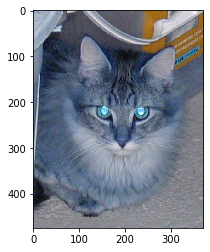

In [50]:
print(categories[np.argmax(model.predict(refinedImageOne))])
plt.imshow(testData)

### 모델 저장

In [51]:
model_json = model.to_json()
with open("d:\model_catdog.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("d:\model_catdog_kopo_weight.h5")

### 폴더 분리

In [52]:
import os, shutil

In [53]:
org_train_path='../images/cat_dog/input/test/'
copy_train_path = '../images/cat_dog/input/test/'

In [55]:
##이미지 파일 명 불러오기
images = os.listdir(org_train_path)

In [56]:
images

['1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.

In [64]:
def copy_files(train_val_path, start_num, end_num):
    ## 이동 대상 이미지 파일경로 리스트에 담기
    
    for i in range(start_num, end_num):
        ##images 이미지 파일 명을 기존 파일과 같이 있음
        image_path = os.path.join(org_train_path + images[i])
        testData = cv2.imread(org_train_path+ images[i], cv2.IMREAD_COLOR)
        refinedImageOne = refineImage(testData)
        
        category_path = categories[np.argmax(model.predict(refinedImageOne))]
        target_copy_paths=os.path.join(copy_train_path, train_val_path,category_path)
        
        if not os.path.isdir(target_copy_paths):
            os.makedirs(target_copy_paths)
            
        shutil.copy(image_path, target_copy_paths)

        
        
    print('copy job completed')
    



In [65]:
copy_files("outputData",1,200)

copy job completed
